In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
sns.set_style("whitegrid")

In [3]:
df_results = pd.read_parquet("merge.parquet")
df_results

,Array Length,Execution Time,Key Comparisons
0,100000,1.110196,1536649
1,200000,2.514357,3272511
2,300000,3.910297,5084804
3,400000,4.151510,6944922
4,500000,6.997661,8836434
...,...,...,...
95,9600000,89.276151,210707808
96,9700000,87.912861,213054856
97,9800000,94.497632,215403466
98,9900000,99.594412,217754041


In [4]:
df_hybrid_results = pd.read_parquet('baseline.parquet')
df_hybrid_results 

,Array Length,Threshold,Execution Time,Key Comparisons
0,100000,1,1.313782,1536479
1,100000,3,1.183452,1536509
2,100000,5,1.216695,1536903
3,100000,7,1.162890,1557994
4,100000,9,1.053231,1557994
...,...,...,...,...
4995,10000000,91,183.770990,367347254
4996,10000000,93,179.206839,367281854
4997,10000000,95,179.332314,367343528
4998,10000000,97,180.904065,367328078


### Threshold set to 7 based on optimal value

In [5]:
df_hybrid_optimal_results = df_hybrid_results.loc[df_hybrid_results['Threshold'] == 7].drop(columns=['Threshold'])
df_hybrid_optimal_results

,Array Length,Execution Time,Key Comparisons
3,100000,1.162890,1557994
53,200000,2.484941,3315337
103,300000,3.849827,5112626
153,400000,5.297704,7031781
203,500000,7.260887,8910057
...,...,...,...
4753,9600000,169.127021,211596856
4803,9700000,172.333480,213976458
4853,9800000,172.722719,216350331
4903,9900000,165.188722,218728488


In [ ]:
# df_results = df_hybrid_results.loc[df_hybrid_results['Threshold'] == 1].drop(columns=['Threshold'])
# df_hybrid_optimal_results

In [7]:
df = df_results.merge(
    df_hybrid_optimal_results,
    left_on='Array Length',
    right_on='Array Length',
    suffixes=(" Merge", " Hybrid")
)
df

,Array Length,Execution Time Merge,Key Comparisons Merge,Execution Time Hybrid,Key Comparisons Hybrid
0,100000,1.110196,1536649,1.162890,1557994
1,200000,2.514357,3272511,2.484941,3315337
2,300000,3.910297,5084804,3.849827,5112626
3,400000,4.151510,6944922,5.297704,7031781
4,500000,6.997661,8836434,7.260887,8910057
...,...,...,...,...,...
95,9600000,89.276151,210707808,169.127021,211596856
96,9700000,87.912861,213054856,172.333480,213976458
97,9800000,94.497632,215403466,172.722719,216350331
98,9900000,99.594412,217754041,165.188722,218728488


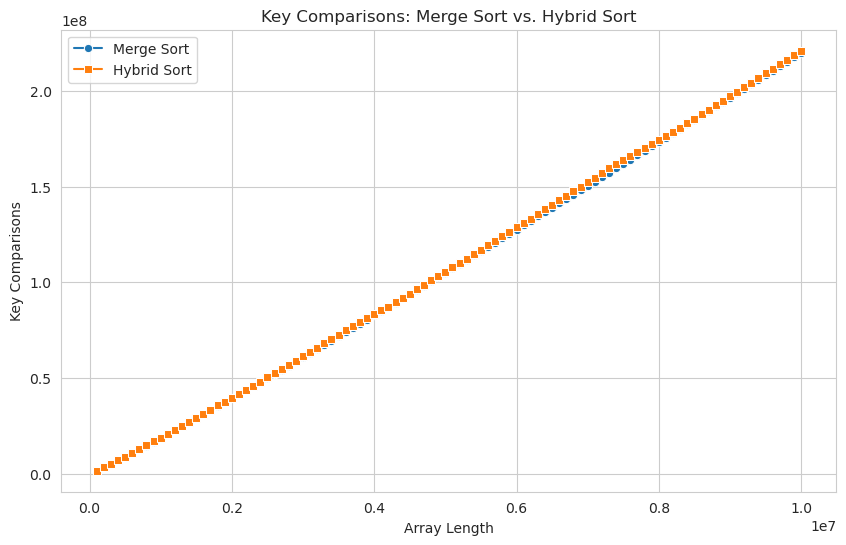

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.lineplot(x=df["Array Length"], y=df["Key Comparisons Merge"], marker='o', label="Merge Sort")
sns.lineplot(x=df["Array Length"], y=df["Key Comparisons Hybrid"], marker='s', label="Hybrid Sort")

plt.xlabel("Array Length")
plt.ylabel("Key Comparisons")
plt.title("Key Comparisons: Merge Sort vs. Hybrid Sort")
plt.legend()
plt.grid(True)

plt.show()


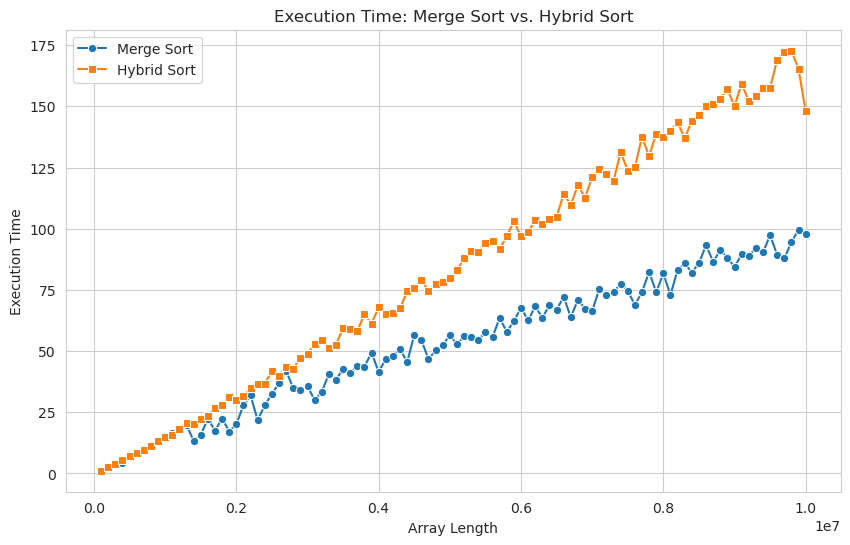

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.lineplot(x=df["Array Length"], y=df["Execution Time Merge"], marker='o', label="Merge Sort")
sns.lineplot(x=df["Array Length"], y=df["Execution Time Hybrid"], marker='s', label="Hybrid Sort")

plt.xlabel("Array Length")
plt.ylabel("Execution Time")
plt.title("Execution Time: Merge Sort vs. Hybrid Sort")
plt.legend()
plt.grid(True)

plt.show()
